In [3]:
# import nltk
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

In [151]:
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [177]:
path_json = 'data/oto_car_json.json'

In [207]:
df = pd.read_json(path_json,lines=True)

In [208]:
df = df[df.model=='Suzuki Ertiga (2016-2017) GL MT']

In [209]:
model = list(df.model)

In [212]:
df.head()

,city,brand,km,year,fuel,model,type,price
1025,Jakarta Barat,suzuki,27154.0,2016,Bensin,Suzuki Ertiga (2016-2017) GL MT,mpv,125000000
1029,Jakarta Barat,suzuki,10335.0,2016,Bensin,Suzuki Ertiga (2016-2017) GL MT,mpv,140000000
1030,Jakarta Barat,suzuki,14314.0,2016,Bensin,Suzuki Ertiga (2016-2017) GL MT,mpv,140000000
1031,Jakarta Barat,suzuki,25580.0,2016,Bensin,Suzuki Ertiga (2016-2017) GL MT,mpv,140000000
1035,Jakarta Barat,suzuki,11889.0,2017,Bensin,Suzuki Ertiga (2016-2017) GL MT,mpv,145000000


In [213]:
df.to_csv('data/testing/test_ertiga.csv')

## Pre-Processing dataset

In [132]:
print('Total Dataset available before removing duplicates : %d' %(len(df)))

Total Dataset available before removing duplicates : 463


1. Creating string km to float

In [211]:
df['km'] = df['km'].apply(lambda x: str(x))
df['km'] = df['km'].apply(lambda x: removedot(x))
df['km'] = df['km'].apply(lambda x: float(x))

In [126]:
def removedot(s):
    s = s.replace('.','')
    return s

In [127]:
def convert_price(s):
    a = removedot(s)
    b = a.replace(' ', ',')
    c = b.split(',')
    d = c[1:][0]
    return float(d)

In [97]:
convert_price(df.Price[0])

149000000.0

In [98]:
def convert_distance(s):
    a = removedot(s)
    b = a.replace(' ', ',')
    c = b.replace('-', ',')
    d = c.split(',')
    avg = (float(d[0]) + float(d[1]))/2
    return avg

In [99]:
convert_distance(df.Distance[0])

72500.0

In [100]:
df['km'] = df['lm'].apply(lambda x:str(x))

ValueError: could not convert string to float: '>300000'

In [13]:
df['km'] = df['Distance']
df['fuel'] = df['Fuel Type'].apply(lambda x: x.lower())
df['model'] = df['Model'].apply(lambda x: x.lower())
df['year'] = df['Year'].apply(lambda x: float(x))

ValueError: could not convert string to float: '75.000-80.000 km'

In [8]:
df['km'] = df['km'].apply(lambda x: float(x))

In [9]:
df['price'] = df['price'].apply(lambda x: float(x))

2. All small caps 

In [10]:
df['fuel'] = df['fuel'].apply(lambda x: x.lower())
df['model'] = df['model'].apply(lambda x: x.lower())
df['brand'] = df['brand'].apply(lambda x: x.lower())
df['city'] = df['city'].apply(lambda x: x.lower())
df['type'] = df['type'].apply(lambda x: x.lower())

In [11]:
df.head()

,city,brand,km,year,fuel,model,type,price
0,tangerang selatan,lexus,26418.0,2012,bensin,lexus gs 200t,sedan,539000000.0
1,tangerang selatan,lexus,20950.0,2012,bensin,lexus gs 2015 250,sedan,475000000.0
2,tangerang selatan,lexus,31087.0,2012,bensin,lexus gs 2015 350,sedan,588000000.0
3,tangerang selatan,lexus,55992.0,2008,bensin,lexus ls 500,sedan,325000000.0
4,tangerang selatan,lexus,63217.0,2009,bensin,lexus ls 460,sedan,535000000.0


3. Dropping Duplicates

In [12]:
df = df.drop_duplicates()

In [13]:
print('Total Dataset available after removing duplicates : %d' %(len(df)))

Total Dataset available after removing duplicates : 14941


In [14]:
df['count'] = 1

4. Creating delta year wrt 2019

In [15]:
# df['delta_year'] = 2019 - df['year']
base_year = 2019
df["delta_year"] = df["year"].apply(lambda x: base_year - x)
df["model"] = df["model"].apply(lambda x: x.lower())
df.head()

,city,brand,km,year,fuel,model,type,price,count,delta_year
0,tangerang selatan,lexus,26418.0,2012,bensin,lexus gs 200t,sedan,539000000.0,1,7
1,tangerang selatan,lexus,20950.0,2012,bensin,lexus gs 2015 250,sedan,475000000.0,1,7
2,tangerang selatan,lexus,31087.0,2012,bensin,lexus gs 2015 350,sedan,588000000.0,1,7
3,tangerang selatan,lexus,55992.0,2008,bensin,lexus ls 500,sedan,325000000.0,1,11
4,tangerang selatan,lexus,63217.0,2009,bensin,lexus ls 460,sedan,535000000.0,1,10


## Data Exploration 

In [16]:
brand = df.groupby('brand').agg({'count': 'sum'}).reset_index()

In [17]:
brand.head()

,brand,count
0,aston-martin,1
1,audi,20
2,bmw,155
3,chevrolet,189
4,daihatsu,1488


Number of brands : 36


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 <a list of 36 Text xticklabel objects>)

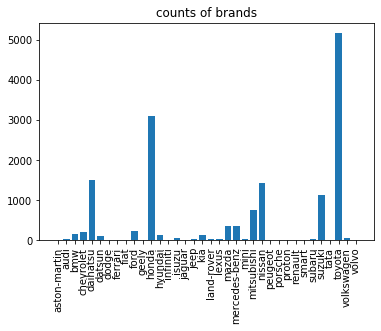

In [18]:
print('Number of brands : %d' %(len(brand)))
plt.bar(brand['brand'], brand['count'])
plt.title('counts of brands')
plt.xticks(rotation=90)

In [19]:
year = df.groupby('year').agg({'count': 'sum'}).reset_index()

Number of years : 35


(array([1970., 1980., 1990., 2000., 2010., 2020., 2030.]),
 <a list of 7 Text xticklabel objects>)

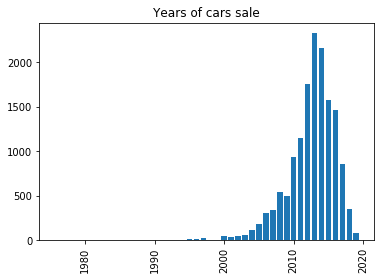

In [20]:
print('Number of years : %d' %(len(year)))
plt.bar(year['year'], year['count'])
plt.title('Years of cars sale')
plt.xticks(rotation=90)

In [21]:
fuel = df.groupby('fuel').agg({'count': 'sum'}).reset_index()

Number of fuel types : 7


([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

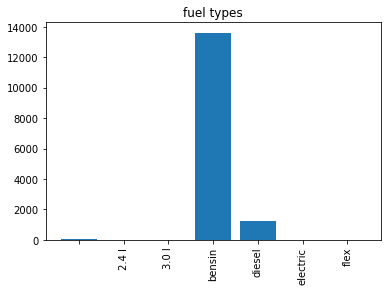

In [22]:
print('Number of fuel types : %d' %(len(fuel)))
plt.bar(fuel['fuel'], fuel['count'])
plt.title('fuel types')
plt.xticks(rotation=90)

In [23]:
car_type = df.groupby('type').agg({'count': 'sum'}).reset_index()

Number of car types : 14


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

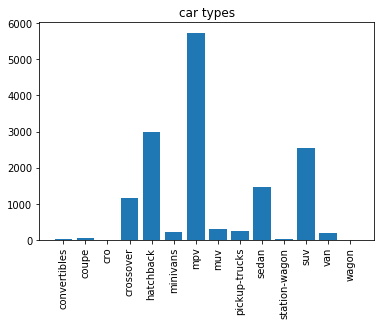

In [24]:
print('Number of car types : %d' %(len(car_type)))
plt.bar(car_type['type'], car_type['count'])
plt.title('car types')
plt.xticks(rotation=90)

In [25]:
model = df.groupby('model').agg({'count': 'sum'}).reset_index()

In [26]:
model = model.sort_values('count').reset_index(drop=True)

Number of model : 1121


Text(0.5, 1.0, 'model types')

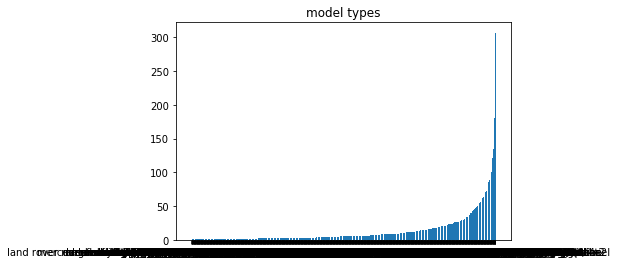

In [27]:
print('Number of model : %d' %(len(model)))
plt.bar(model['model'], model['count'])
plt.title('model types')

In [27]:
model.tail(10)

,model,count
1111,daihatsu terios (2006-2017) tx mt,129
1112,nissan grand livina 1.5 xv cvt,133
1113,honda hrv (2015-2018) 1.5l e cvt,135
1114,daihatsu xenia r mt 1.3 std,144
1115,honda jazz (2008-2014) 1.5l rs at,176
1116,toyota kijang innova g m/t gasoline,180
1117,toyota avanza (2011-2015) 1.3 g mt,210
1118,honda crv (2012-2017) 2.4 i-vtec at,219
1119,honda freed (2009-2014) psd,300
1120,toyota avanza 1.3 g m/t,307


In [28]:
price = df.groupby('price').agg({'count': 'sum'}).reset_index()

In [29]:
price = price.sort_values('price').reset_index(drop=True)

In [30]:
price.head()

,price,count
0,1.0,1
1,2.0,2
2,77.0,1
3,92.0,1
4,100.0,1


In [31]:
price.tail(5)

,price,count
920,4.500000e+09,1
921,8.765434e+09,1
922,5.565657e+10,1
923,7.876565e+10,1
924,9.879880e+10,1


In [32]:
df.describe()

,km,year,price,count,delta_year
count,1.494100e+04,14941.000000,1.494100e+04,14941.0,14941.000000
mean,7.507183e+04,2012.560471,1.966210e+08,1.0,6.439529
std,2.021223e+05,3.490996,1.139343e+09,0.0,3.490996
min,1.000000e+00,1976.000000,1.000000e+00,1.0,0.000000
25%,3.324500e+04,2011.000000,1.100000e+08,1.0,4.000000
50%,6.000000e+04,2013.000000,1.450000e+08,1.0,6.000000
75%,9.024500e+04,2015.000000,1.980000e+08,1.0,8.000000
max,9.999999e+06,2019.000000,9.879880e+10,1.0,43.000000


In [33]:
data = df.copy()

## Removing < 1%tile and >99% data 
Since a lot of pricing given is incorrect

In [82]:
lower = 0.05
upper = 0.95

In [83]:
print('Lenfth of data: %d' %(len(data)))

Lenfth of data: 14643


In [84]:
data = data[data.price > data.price.quantile(lower)]

In [85]:
print('Lenfth of data: %d' %(len(data)))

Lenfth of data: 13806


In [86]:
data = data[data.price < data.price.quantile(upper)]

In [87]:
print('Lenfth of data: %d' %(len(data)))

Lenfth of data: 13093


In [88]:
data.describe()

,km,year,price,count,delta_year
count,1.309300e+04,13093.000000,1.309300e+04,13093.0,13093.000000
mean,7.052977e+04,2012.707095,1.622267e+08,1.0,6.292905
std,1.044082e+05,3.142284,6.390266e+07,0.0,3.142284
min,1.000000e+00,1976.000000,8.100000e+07,1.0,0.000000
25%,3.512000e+04,2011.000000,1.150000e+08,1.0,4.000000
50%,6.100000e+04,2013.000000,1.450000e+08,1.0,6.000000
75%,8.997600e+04,2015.000000,1.890000e+08,1.0,8.000000
max,8.996486e+06,2019.000000,3.720000e+08,1.0,43.000000


In [89]:
data.head()

,city,brand,km,year,fuel,model,type,price,count,delta_year
3,tangerang selatan,lexus,55992.0,2008,bensin,lexus ls 500,sedan,325000000.0,1,11
5,jakarta selatan,lexus,111747.0,2001,bensin,lexus lx 570,suv,335000000.0,1,18
8,jakarta pusat,lexus,3632.0,2001,bensin,lexus ls 460,sedan,180000000.0,1,18
22,jakarta utara,lexus,131472.0,2000,bensin,lexus ls 430 (2002-2006) 4300atfacelift,sedan,285000000.0,1,19
25,jakarta barat,kia,37000.0,2013,bensin,kia picanto mt,hatchback,85000000.0,1,6


## Exploring Particular Model

For starting taking toyota avanza 1.3 g m/t, its count is 282


In [90]:
models = list(model.model)

In [91]:
# for i in range(len(models)):
    

In [92]:
avanza = data[data.model == 'toyota avanza 1.3 g m/t'].reset_index(drop=True)

In [93]:
avanza.head()

,city,brand,km,year,fuel,model,type,price,count,delta_year
0,jakarta barat,toyota,20951.0,2013,bensin,toyota avanza 1.3 g m/t,mpv,125000000.0,1,6
1,jakarta barat,toyota,26216.0,2013,bensin,toyota avanza 1.3 g m/t,mpv,125000000.0,1,6
2,jakarta barat,toyota,17673.0,2016,bensin,toyota avanza 1.3 g m/t,mpv,155000000.0,1,3
3,jakarta barat,toyota,23780.0,2016,bensin,toyota avanza 1.3 g m/t,mpv,150000000.0,1,3
4,jakarta barat,toyota,6371.0,2015,bensin,toyota avanza 1.3 g m/t,mpv,150000000.0,1,4


In [94]:
avanza.corr()

,km,year,price,count,delta_year
km,1.000000,-0.429325,-0.409345,NaN,0.429325
year,-0.429325,1.000000,0.875177,NaN,-1.000000
price,-0.409345,0.875177,1.000000,NaN,-0.875177
count,NaN,NaN,NaN,NaN,NaN
delta_year,0.429325,-1.000000,-0.875177,NaN,1.000000


In [95]:
price_ava = avanza.groupby('delta_year').agg({'price': 'median'})

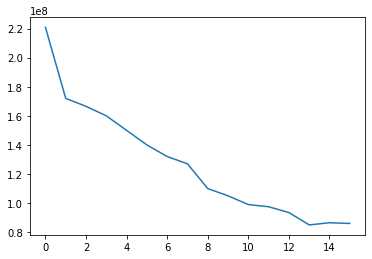

In [96]:
plt.plot(price_ava)

In [97]:
price_ava.head()

,price
delta_year,
0,220883000.0
1,172000000.0
2,166500000.0
3,160000000.0
4,150000000.0


In [98]:
price_ava['depreciation'] = 0

In [99]:
price = list(price_ava.price)

In [100]:
depreciation = []
for i in range(len(price)):
    if i == 0:
        base_price = price[i]
        depreciation.append(0)
    else:
        change = (base_price - price[i])*100/base_price
        depreciation.append(change)

price_ava['depreciation'] = depreciation

Text(0.5, 1.0, 'Depreciation % of cars Yearwise')

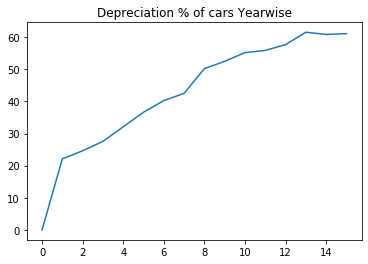

In [101]:
plt.plot(price_ava.depreciation)
plt.title('Depreciation % of cars Yearwise')

In [102]:
yearwise_ava = avanza.groupby('delta_year').agg({'count': 'sum'}).reset_index(drop=True)

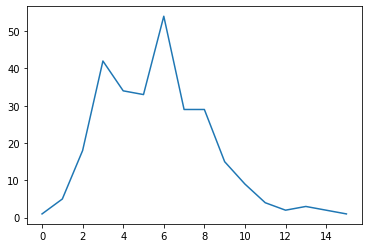

In [103]:
plt.plot(yearwise_ava)

In [104]:
km_ava = avanza.groupby('price').agg({'km': 'mean'}).reset_index(drop=True)

In [105]:
km_ava.head()

,km
0,217000.000000
1,123338.000000
2,14533.000000
3,185478.000000
4,165976.666667


(array([10., 24., 21., 13.,  5.,  1.,  2.,  1.,  1.,  1.]),
 array([1.000000e+00, 2.500090e+04, 5.000080e+04, 7.500070e+04,
        1.000006e+05, 1.250005e+05, 1.500004e+05, 1.750003e+05,
        2.000002e+05, 2.250001e+05, 2.500000e+05]),
 <a list of 10 Patch objects>)

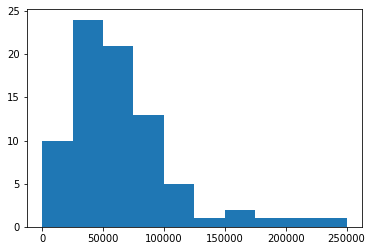

In [106]:
plt.hist(km_ava['km'])

In [219]:
y = avanza.price

In [220]:
y = y.values

In [221]:
y_max = max(y)

In [222]:
y_per = (y_max - y)*100/y_max

In [223]:
# y = y_per

In [224]:
y_mean = y.mean()
y_std = y.std()

In [225]:
y = (y - y_mean)/y_std

In [226]:
x = avanza[['km', 'delta_year']].copy()

In [227]:
x.head()

,km,delta_year
0,20951.0,6
1,26216.0,6
2,17673.0,3
3,23780.0,3
4,6371.0,4


In [228]:
x_km_mean = x.km.mean()
x_km_range = x.km.max() - x.km.min()

In [229]:
x['km'] = (x.km - x_km_mean) / x_km_range

In [230]:
x.head()

,km,delta_year
0,-0.157419,6
1,-0.136359,6
2,-0.170531,3
3,-0.146103,3
4,-0.215740,4


In [231]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

(array([40., 50., 61., 26., 14.,  8.,  4.,  3.,  1.,  3.]),
 array([-0.24121964, -0.14521966, -0.04921967,  0.04678031,  0.14278029,
         0.23878028,  0.33478026,  0.43078025,  0.52678023,  0.62278021,
         0.7187802 ]),
 <a list of 10 Patch objects>)

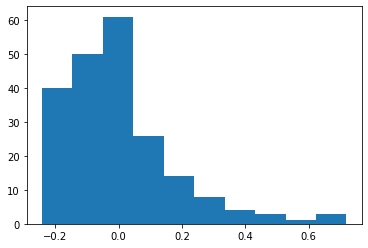

In [232]:
plt.hist(x_train.km)

(array([17., 18., 20.,  5.,  6.,  2.,  2.,  0.,  0.,  1.]),
 array([-0.23480362, -0.13544522, -0.03608682,  0.06327158,  0.16262997,
         0.26198837,  0.36134677,  0.46070517,  0.56006356,  0.65942196,
         0.75878036]),
 <a list of 10 Patch objects>)

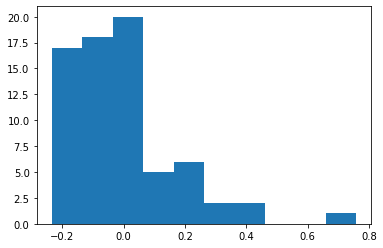

In [234]:
plt.hist(x_test.km)

In [235]:
reg = LinearRegression()
# reg.fit(x_train, y_train)

In [236]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [237]:
def r2(y_pred, y_true):
    res = np.sum(np.square(y_pred - y_true))
    tot = np.sum(np.square(y_true - np.mean(y_true)))
    return 1 - res/tot


In [238]:
def rmse(y_pred, y_true):
    sq_pred = np.power(y_pred, 2)

RMSE of Linear Regression classifier: 0.4019
R2 of Linear Regression classifier: 0.84


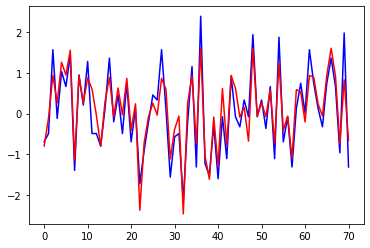

In [239]:
y_pred = reg.predict(x_test)
score = math.sqrt(mean_squared_error(y_pred, y_test))
print("RMSE of Linear Regression classifier:", round(score,4))
print("R2 of Linear Regression classifier:", np.round(r2(y_pred, y_test),4))

plt.plot(y_test, color='blue')
plt.plot(y_pred, color='red')
plt.show()

## Decision Tree

In [240]:
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

RMSE of Decision Tree Regression: 0.5778
R2 of Decision Tree Regression: 0.6693


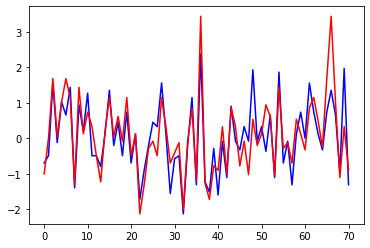

In [241]:
y_pred = regressor.predict(x_test)
score = math.sqrt(mean_squared_error(y_pred, y_test))
print("RMSE of Decision Tree Regression:", round(score,4))
print("R2 of Decision Tree Regression:", np.round(r2(y_pred, y_test),4))

plt.plot(y_test, color='blue')
plt.plot(y_pred, color='red')
plt.show()

## Random Forest

In [242]:
forest = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=100)
forest.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

RMSE of Random Forest Regressor: 0.4188
R2 of Random Forest Regressor: 0.8262


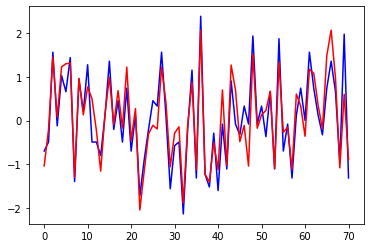

In [243]:
y_pred = forest.predict(x_test)
score = math.sqrt(mean_squared_error(y_pred, y_test))
print("RMSE of Random Forest Regressor:", round(score,4))
print("R2 of Random Forest Regressor:", np.round(r2(y_pred, y_test),4))

plt.plot(y_test, color='blue')
plt.plot(y_pred, color='red')
plt.show()

## Converting to absolute values

In [244]:
# y_abs_pred = y_max - y_pred * (y_max/100)
# y_abs_test = y_max - y_test * (y_max/100)


In [245]:
y_abs_pred = y_pred*y_std + y_mean
y_abs_test = y_test*y_std + y_mean

In [246]:
err = abs(y_abs_test - y_abs_pred)

### Percentage Error 
Average error while predicting the car price directly

In [247]:
print('Average Error while predicting the car prices: %d Indonesian Rupees' %(err.mean()/len(y_abs_test)))

Average Error while predicting the car prices: 114797 Indonesian Rupees


In [248]:
met = abs(y_abs_test- y_abs_pred)*100/y_abs_pred

In [249]:
print('Mean Percentage error while predicting the prices: %f' %(met.mean()))
print('Range Percentage error while predicting the prices: %f %f' %(min(met), max(met)))

Mean Percentage error while predicting the prices: 5.848118
Range Percentage error while predicting the prices: 0.031228 22.090721


(array([14., 16., 15., 12.,  9.,  2.,  0.,  1.,  0.,  2.]),
 array([ 0.03122833,  2.23717761,  4.44312689,  6.64907617,  8.85502544,
        11.06097472, 13.266924  , 15.47287327, 17.67882255, 19.88477183,
        22.09072111]),
 <a list of 10 Patch objects>)

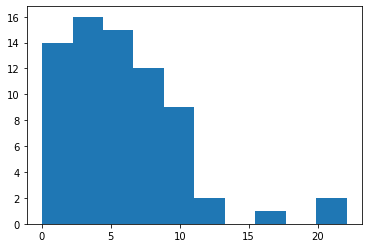

In [250]:
plt.hist(met)

In [251]:
met.sort()
print('95 percentage of times percentage error is below : %s' %(met[int(len(met)*0.80)]))

95 percentage of times percentage error is below : 8.8518521891628


In [256]:
a = x_test[met>10].reset_index(drop=True)

In [257]:
a['km'] = a.km*x_km_range + x_km_mean

In [259]:
a['error'] = met[met>10]

In [260]:
a

,km,delta_year,error
0,20562.0,3,10.174185
1,55846.0,3,10.231184
2,65979.0,5,10.433894
3,45000.0,6,10.559460
4,17673.0,3,10.978428
5,1605.0,1,12.330263
6,36117.0,3,12.330263
7,79741.0,8,16.123364
8,103605.0,3,20.925264
9,13634.0,8,22.090721


## Nueral Network

In [370]:
x_train = x_train.values

In [371]:
from keras.models import Sequential
from keras import layers
from keras.layers.normalization import BatchNormalization

input_dim = x_train.shape[1]  # Number of features
model = []
model = Sequential()
model.add(layers.Dense(30
                       , input_dim=input_dim, activation='relu',kernel_initializer='uniform'))
model.add(layers.Dense(20,kernel_initializer='uniform', activation='relu'))
model.add(layers.Dense(10,kernel_initializer='uniform', activation='relu'))
model.add(layers.Dense(1))

In [372]:
model.compile(loss='mean_squared_error', 
              optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 30)                90        
_________________________________________________________________
dense_18 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_19 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 11        
Total params: 931
Trainable params: 931
Non-trainable params: 0
_________________________________________________________________


In [373]:
history = model.fit(x_train, y_train,
                 epochs=100,
                 verbose=True,
                 validation_data=(x_test, y_test),
                 batch_size=10)

Train on 217 samples, validate on 73 samples
Epoch 1/100
217/217 [==============================] - 3s 12ms/step - loss: 1.2267 - val_loss: 0.3268
Epoch 2/100
217/217 [==============================] - 0s 348us/step - loss: 1.2211 - val_loss: 0.3153
Epoch 3/100
217/217 [==============================] - 0s 409us/step - loss: 1.2116 - val_loss: 0.2952
Epoch 4/100
217/217 [==============================] - 0s 362us/step - loss: 1.1951 - val_loss: 0.2634
Epoch 5/100
217/217 [==============================] - 0s 398us/step - loss: 1.1768 - val_loss: 0.2083
Epoch 6/100
217/217 [==============================] - 0s 362us/step - loss: 1.1457 - val_loss: 0.1809
Epoch 7/100
217/217 [==============================] - 0s 383us/step - loss: 1.1300 - val_loss: 0.1547
Epoch 8/100
217/217 [==============================] - 0s 382us/step - loss: 1.1218 - val_loss: 0.1256
Epoch 9/100
217/217 [==============================] - 0s 386us/step - loss: 1.1192 - val_loss: 0.1143
Epoch 10/100
217/217 [=======

RMSE of NN regressor: 0.2666
R2 of NN regressor: 0.784752109433763


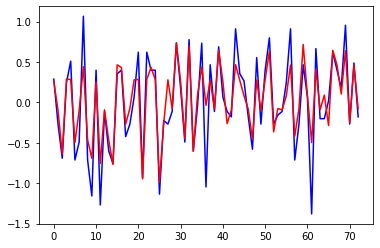

In [374]:
y_pred = model.predict(x_test)
score = math.sqrt(mean_squared_error(y_pred, y_test))
print("RMSE of NN regressor:", round(score,4))
print("R2 of NN regressor:",  r2_score(y_test, y_pred))

plt.plot(y_test, color='blue')
plt.plot(y_pred, color='red')
plt.show()

In [375]:
y_abs_pred = y_pred*y_std + y_mean
y_abs_test = y_test*y_std + y_mean
err = abs(y_abs_test - y_abs_pred)

### Percentage Error 
Average error while predicting the car price directly

In [376]:
print('Average Error while predicting the car prices: %d Indonesian Rupees' %(err.mean()/len(y_abs_test)))

Average Error while predicting the car prices: 353052 Indonesian Rupees


In [377]:
met = np.abs(y_abs_test- y_abs_pred[:,0])*100/y_abs_pred[:,0]

In [378]:
print('Mean Percentage error while predicting the prices: %f' %(met.mean()))
print('Range Percentage error while predicting the prices: %s %s' %(np.min(met), np.max(met)))

Mean Percentage error while predicting the prices: 6.212293
Range Percentage error while predicting the prices: 0.18371832512318972 34.638353837485084


(array([33., 19., 10.,  5.,  1.,  2.,  1.,  0.,  0.,  2.]),
 array([ 0.18371833,  3.62918188,  7.07464543, 10.52010898, 13.96557253,
        17.41103608, 20.85649963, 24.30196318, 27.74742674, 31.19289029,
        34.63835384]),
 <a list of 10 Patch objects>)

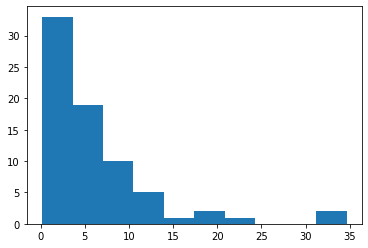

In [379]:
plt.hist(met)

In [380]:
met.sort()
print('95 percentage of times percentage error is below : %s' %(met[int(len(met)*0.95)]))

95 percentage of times percentage error is below : 19.745639374594575


In [261]:
data = {}

In [262]:
data['toyota e1'] = {'mean%': 23,
                     'min%': 2,
                     'max%': 23,
                     '95%time': 16}

In [263]:
df3 = pd.DataFrame(data)

In [285]:
df3

,toyota e1
95%time,16
max%,23
mean%,23
min%,2


In [282]:
models = model.model[model['count'] > 50]

In [284]:
list(models)

['honda mobilio (2013-2017) e  mt',
 'toyota yaris (2009-2012) e at',
 'honda accord 2.4l vti-l',
 'suzuki apv arena gx mt',
 'toyota kijang innova g a/t gasoline',
 'daihatsu sirion (2012-2017) d fmc at',
 'nissan grand livina (2006-2011) 1.5 xv at',
 'suzuki ertiga (2016-2017) gl mt',
 'nissan march 1.2l at',
 'daihatsu terios (2006-2017) tx at extra',
 'toyota avanza (2011-2015) 1.3 e mt',
 'honda brio (2016-2018) satya e cvt',
 'toyota avanza (2011-2015) 1.5 g mt',
 'suzuki ertiga\xa0(2012-2016) gx at',
 'nissan serena (2016-2018) 2.0 hws',
 'toyota rush (2006-2015) s at',
 'mazda biante skyactive',
 'toyota yaris trd trd sportivo cvt',
 'toyota avanza veloz (2011-2015) 1.5 at',
 'daihatsu ayla 1.0l x mt',
 'mazda 2 r at',
 'honda mobilio (2013-2017) rs cvt',
 'toyota vios (2007-2013) g at',
 'nissan grand livina (2011-2013) 1.5 xv at',
 'nissan grand livina 1.5 sv cvt',
 'mitsubishi pajero\xa0sport\xa0(2008-2015) exceed 4x2',
 'honda mobilio e cvt',
 'suzuki ertiga\xa0(2012-2016) 